In [4]:
! pip install yfinance
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import yfinance as yf

import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2020-1-1', end='2020-10-6')

#see your data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,72.444314,73.510538,72.187543,73.449402,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.666848,73.505640,72.507895,72.735321,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.845157,73.354001,71.590827,73.314873,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,73.324680,73.583898,72.747555,72.970093,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,72.669293,74.449588,72.669293,74.143906,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-29 00:00:00-04:00,112.824017,113.572560,111.858780,112.370941,99382200,0.0,0.0
2020-09-30 00:00:00-04:00,112.075450,115.493166,111.908013,114.065010,142675200,0.0,0.0
2020-10-01 00:00:00-04:00,115.867442,115.946238,114.084716,115.030251,116120400,0.0,0.0



Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [6]:
close = df["Close"]

simple_return = close.pct_change()

log_return = np.log(1+simple_return)


Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

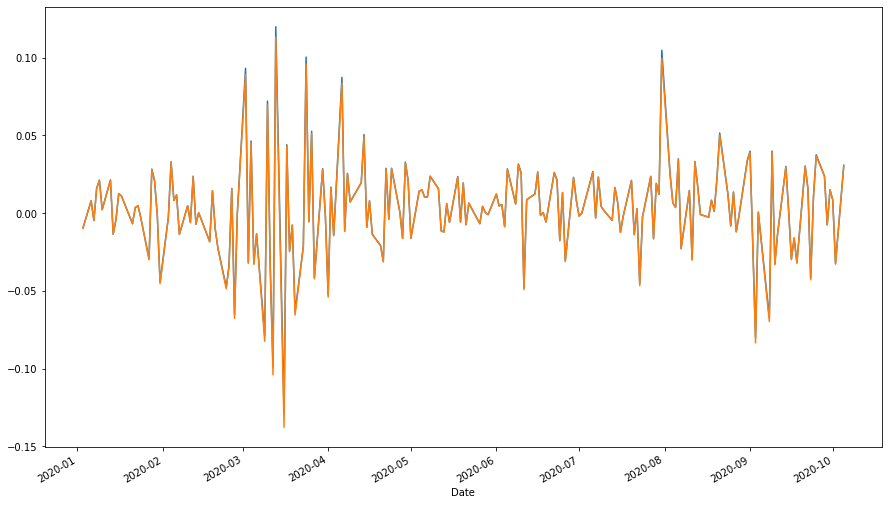

In [7]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#apple["Adj. Close"].plot(grid = False) # Plot the adjusted closing price of AAPL

simple_return.plot()# Plot the lsimple return
log_return.plot() # Plot the logreturn

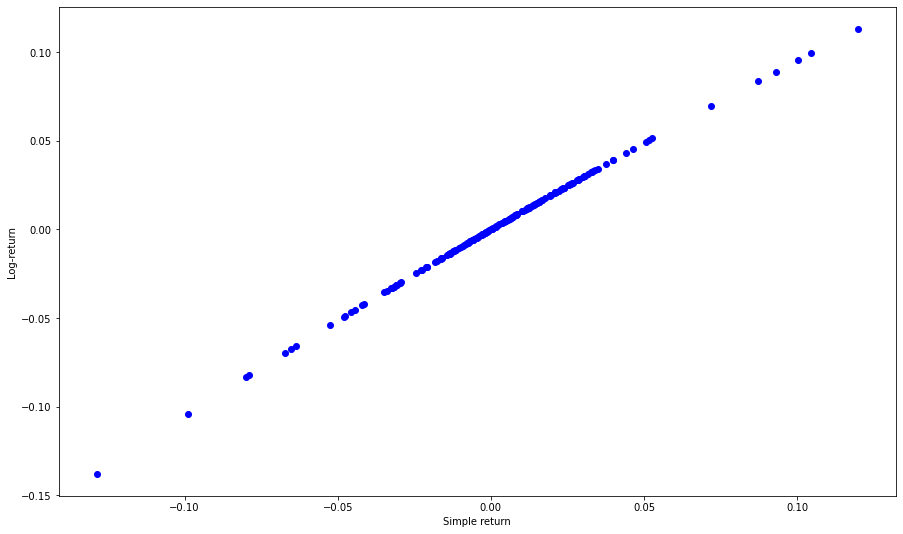

In [8]:
plt.plot(simple_return,log_return, 'o',c='blue')
plt.ylabel( 'Log-return' )
plt.xlabel( 'Simple return' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

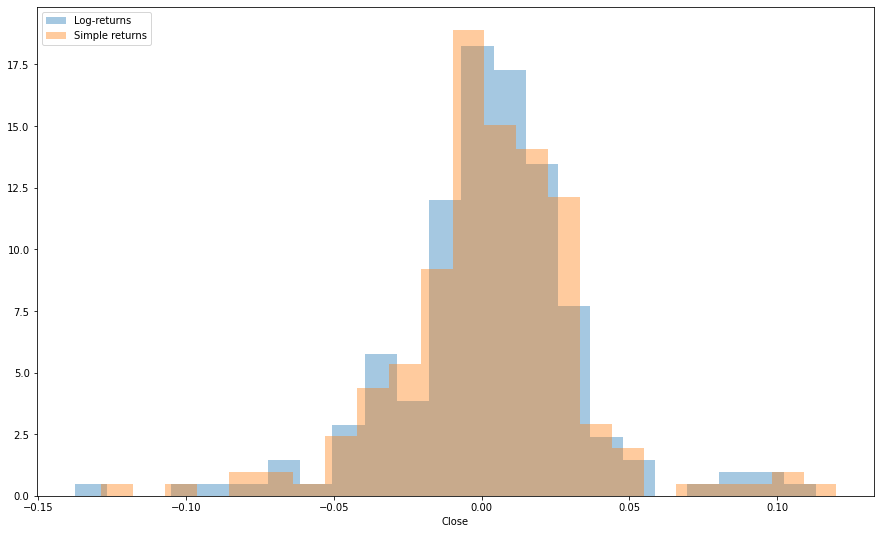

In [9]:
import seaborn as sns

# histogram
sns.distplot(log_return, kde=False, norm_hist=True,label='Log-returns') 
sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  

legend(loc='upper left');

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [11]:
log_return.describe()

count    191.000000
mean       0.002336
std        0.031630
min       -0.137708
25%       -0.011838
50%        0.003563
75%        0.020077
max        0.113157
Name: Close, dtype: float64

In [16]:
log_return=log_return.dropna()

In [19]:
import scipy
from scipy.stats import skew, kurtosis
print(skew(log_return))

-0.33389548077873327


In [21]:
print(kurtosis(log_return,fisher =  False))

6.511066581641305
